This notebook contains the code used to produce the figures in the manuscript **"High-Resolution Digital Image Correlation study of the strain localization in a shot-peened RR1000 nickel-based superalloy"** by Alberto Orozco-Caballero, Thomas Jackson and João Quinta da Fonseca. 

## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HRDIC_analysis as hrdic
from skimage import color
from glob import glob
from scipy.signal import medfilt, medfilt2d
from matplotlib import ticker
from scipy.stats import skew
from cycler import cycler

## Set colours symbols and line styles

In [2]:
color_list = plt.cm.viridis(np.linspace(0, 1, 6))
plt.rc('lines',linewidth=2, markersize=8)
plt.rc('axes', prop_cycle=(cycler(color=color_list)+
                            cycler(marker=['o', '^', 's', 'p' , 'h' , '*'])+
                            cycler(linestyle=['--'])*6))
plt.rc('font', size=14)

## Load data

Shear strain data was stitched using the companion notebook `Stitch_maps_sub.ipynb`.

In [3]:
shear_data=np.load('stitched_shear_maps.npy')

In [4]:
strain_increments=['1.0%','1.5%','2.0%', '2.5%', '3.0%', '4.2%' ]

## HRDIC strain maps (Fig. 4)

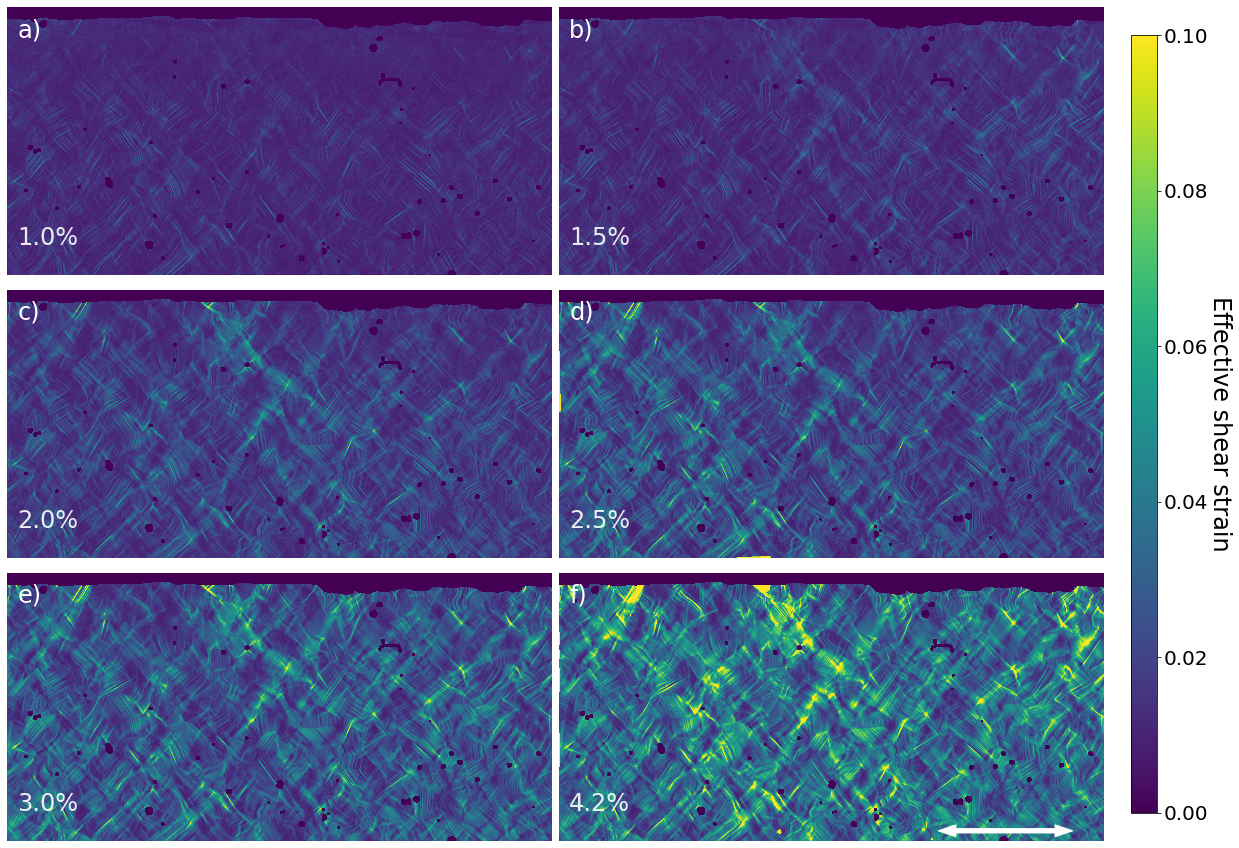

In [5]:
fig_4,axes=plt.subplots(3,2,figsize=(18,12))
fig_labels=['a)','b)','c)','d)','e)','f)','g)']
for fig_label, strain, def_map, ax in zip(fig_labels,strain_increments,shear_data, axes.ravel()):
    im=ax.imshow(medfilt2d(def_map,3), vmin=0, vmax=0.1)
    ax.text(50,1200,strain,fontsize=24,color='white',alpha=0.9)
    ax.text(50,150,fig_label,fontsize=24,color='white')
    ax.axis('off')
    #ax.xaxis.set_major_locator(ticker.NullLocator())
    #ax.yaxis.set_major_locator(ticker.NullLocator())
plt.tight_layout()

ax.arrow(2000,1300, 500, 0, shape='full', color='white', width=20)
ax.arrow(2500,1300, -500, 0, shape='full', color='white', width=20)
fig_4.subplots_adjust(right=0.9)
cbar_ax = fig_4.add_axes([0.9, 0.05, 0.02, 0.9])
cbar=fig_4.colorbar(im, cax=cbar_ax)
cbar.ax.get_yaxis().labelpad = 24
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel('Effective shear strain', rotation=270,fontsize=24);

### Create a gif:

In [6]:
#!convert -morph 2 -delay 90 -loop 0 shear_step*.png strain.gif

## Strain distribution (Fig. 5)

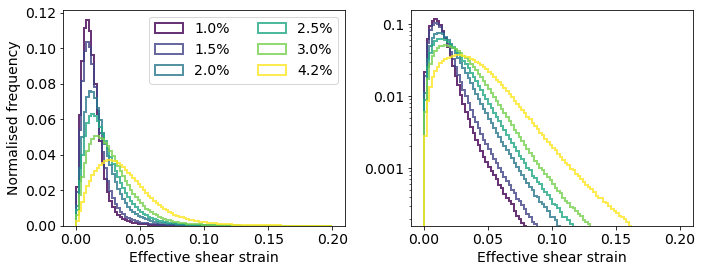

In [7]:
fig_5, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(10,4))

for strain_vals in shear_data:
    weights=np.ones_like(strain_vals.ravel())/len(strain_vals.ravel())
    ax1.hist(strain_vals.ravel(), bins=100, range=(0,0.2), weights=weights, log=False, 
             linestyle='-', alpha=0.8, lw=2, 
             histtype='step');
    
for strain_vals in shear_data:
    weights=np.ones_like(strain_vals.ravel())/len(strain_vals.ravel())
    ax2.hist(strain_vals.ravel(), bins=100, range=(0,0.2), weights=weights, log=True, 
             linestyle='-', alpha=0.8, lw=2, 
             histtype='step');

ax2.set_ylim([10**-3.8,10**-0.8])
ax1.legend(strain_increments,ncol=2,loc='upper right')
ax1.set_ylabel('Normalised frequency')
ax1.set_xlabel('Effective shear strain')
ax2.set_xlabel('Effective shear strain')
ax2.set_yticks([0.001, 0.01, 0.1]);
ax2.set_yticklabels([0.001, 0.01, 0.1]);
plt.tight_layout()

## Line profiles

### Functions

In [8]:
def get_strain_profile(strain_map, steps=17, step_size=75):
     # stepsize in pixels
    strain_slices=[]
    for map_slice in range(1,steps+1):
        region_strain=strain_map[int(40+step_size*(map_slice-1)):int(40+step_size*(map_slice)),:]
        region_strain=region_strain[(region_strain != -999)&(region_strain < 2)]
        strain_slices.append(region_strain)
    mean_strain_profiles=[]
    median_strain_profiles=[]
    skew_strain_profiles=[]
    for strain in strain_slices:
        mean_strain_profiles.append(np.mean(strain))
        median_strain_profiles.append(np.median(strain))
        skew_strain_profiles.append(skew(strain))
    return strain_slices,mean_strain_profiles, median_strain_profiles, skew_strain_profiles

def plot_profile(strain_list, profile_steps):
    for strain in strain_list:
        plt.plot(profile_steps,strain)
    plt.legend(strain_increments, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('Strain')
    plt.xlabel(r'Distance from surface ($\mathrm{\mu}$m)')
    
def plot_profile_norm(strain_list, profile_steps):
    for strain in strain_list:
        strain=strain/strain[0]
        plt.plot(profile_steps,strain)
    plt.legend(strain_increments,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('Normalised strain')
    plt.xlabel(r'Distance from surface ($\mathrm{\mu}$m)')
    
def plot_profile_all(strain_list1,strain_list2,profile_steps, save_fig=False):
                     
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',sharey='row',figsize=(10,8))
    
    #ax = f.add_subplot(111)
    
    for strain in strain_list1:
        ax1.plot(profile_steps,strain)
        ax3.plot(profile_steps,strain/strain[0])
    
    for strain in strain_list2:
        ax2.plot(profile_steps,strain)
        ax4.plot(profile_steps,strain/strain[0])

    ax1.set_ylabel('Effective shear strain')
    ax3.set_ylabel('Normalised effective shear strain')
    ax1.set_title('Mean values')
    ax2.set_title('Median values')
    #ax2.legend(strain_increments,loc='center left', bbox_to_anchor=(1, 0))
    ax3.legend(strain_increments,loc='upper left')
    ax3.set_xlabel(r'Distance from surface ($\mathrm{\mu}$m)')
    ax4.set_xlabel(r'Distance from surface ($\mathrm{\mu}$m)')
    ax1.grid('True')
    ax2.grid('True')
    ax3.grid('True')
    ax4.grid('True')
    plt.tight_layout()
    
    return f
        

### Get values for depth profile plots

In [9]:
profile_steps2=np.linspace(12.5,412.5,34)
   
mean_profiles2=[]
med_profiles2=[]
slice_list=[]

for strain_map in shear_data:
    strain_slices, mean_strain, med_strain, skew_strain = get_strain_profile(strain_map, steps=34, step_size=37.5)
    mean_profiles2.append(mean_strain)
    med_profiles2.append(med_strain)
    slice_list.append(strain_slices)

In [11]:
profile_steps2

array([ 12.5       ,  24.62121212,  36.74242424,  48.86363636,
        60.98484848,  73.10606061,  85.22727273,  97.34848485,
       109.46969697, 121.59090909, 133.71212121, 145.83333333,
       157.95454545, 170.07575758, 182.1969697 , 194.31818182,
       206.43939394, 218.56060606, 230.68181818, 242.8030303 ,
       254.92424242, 267.04545455, 279.16666667, 291.28787879,
       303.40909091, 315.53030303, 327.65151515, 339.77272727,
       351.89393939, 364.01515152, 376.13636364, 388.25757576,
       400.37878788, 412.5       ])

## Plotting all depth profiles (Fig. 6)

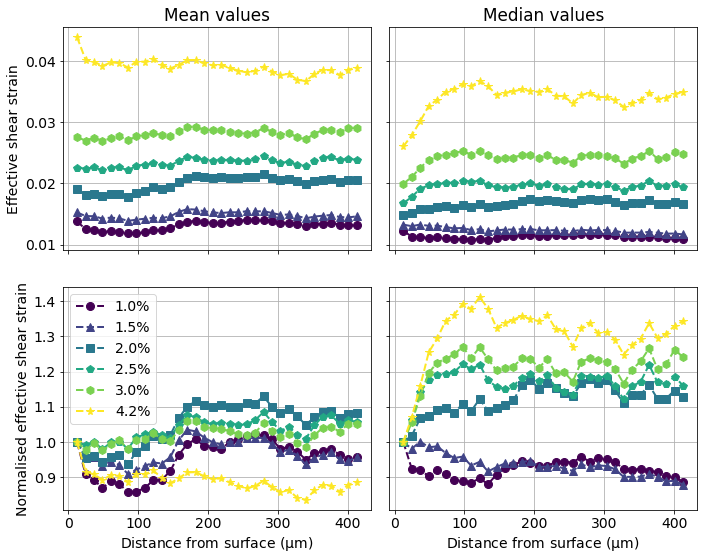

In [11]:
fig_6 = plot_profile_all(mean_profiles2,med_profiles2,profile_steps2)

### Mean over median ratio (Fig. 8)

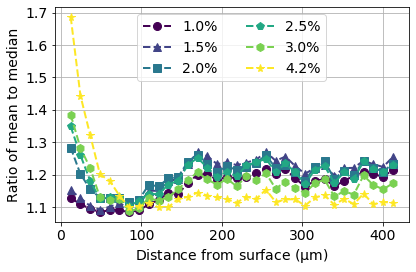

In [12]:
fig_8=plt.figure(figsize=(6,4))
plot_profile(np.array(mean_profiles2)/np.array(med_profiles2),profile_steps2)
#plt.title('mean/median');
plt.ylabel('Ratio of mean to median')
plt.legend(strain_increments,ncol=2,loc='upper center')
plt.grid('True')
plt.tight_layout()

## Surface vs bulk strain distribution (Fig. 7)

In [13]:
def plot_dist_all(slice_list):
                     
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,sharey='row',figsize=(10,8))

    #bulk
    for strain_slice in slice_list:
        weights=np.ones_like(strain_slice[-1].ravel())/len(strain_slice[-1].ravel())
        ax1.hist(strain_slice[-1].ravel(), bins=100, range=(0,0.2), density=False, weights=weights,
                 linestyle='-', alpha=0.8, lw=2, 
                 histtype='step');
        # ax1.legend(strain_increments,ncol=2,loc='upper right')
        
    #surface
    for strain_slice in slice_list:
        weights=np.ones_like(strain_slice[0].ravel())/len(strain_slice[0].ravel())
        ax2.hist(strain_slice[0].ravel(), bins=100, range=(0,0.2), density=False, weights=weights,
                 linestyle='-', alpha=0.8, lw=2, 
                 histtype='step');
        ax2.legend(strain_increments,ncol=2,loc='upper right')
    
    for strain_slice in slice_list:
        weights=np.ones_like(strain_slice[-1].ravel())/len(strain_slice[-1].ravel())
        ax3.hist(strain_slice[-1].ravel(), bins=100, range=(0,0.2), weights=weights, log=True, 
             linestyle='-', alpha=0.8, lw=2, 
             histtype='step');
        ax3.set_ylim([10**-3.5,10**-0.8])

    for strain_slice in slice_list:
        weights=np.ones_like(strain_slice[0].ravel())/len(strain_slice[0].ravel())
        plt.hist(strain_slice[0].ravel(), bins=100, range=(0,0.2), weights=weights, log=True, 
             linestyle='-', alpha=0.8, lw=2, 
             histtype='step');
        ax4.set_ylim([10**-3.5,10**-0.8])

    hist_labelling(ax1,ax2,ax3,ax4)
    return f


def hist_labelling(ax1,ax2,ax3,ax4):   
    ax3.set_xlabel('Effective shear strain')
    ax4.set_xlabel('Effective shear strain')
    ax1.set_ylabel('Normalised frequency')
    ax3.set_ylabel('Normalised frequency')
    #ax2.set_ylabel('Shear strain')
    ax1.set_title(u'Bulk (at 400 \u03bcm)')
    ax2.set_title('Surface')
    ax3.set_yticks([0.001, 0.01, 0.1]);
    ax3.set_yticklabels([0.001, 0.01, 0.1]);
    for ax in [ax1, ax2, ax3, ax4]:
        ax.grid('True')
        ax.set_axisbelow(True)
    plt.tight_layout()

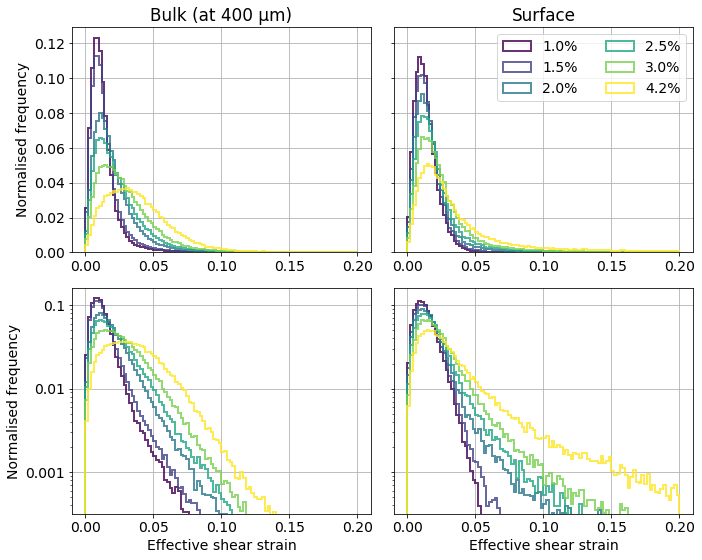

In [14]:
fig_7 = plot_dist_all(slice_list)

## Save figures

In [15]:
#fig_4.savefig('deformation_maps.png', dpi=150)
#fig_5.savefig('strain_distribution_overall.png', dpi=150)
#fig_6.savefig('all_shear_profiles.png', dpi=150)
#fig_7.savefig('bulk_vs_surface.png', dpi=150)
#fig_8.savefig('mean_med_ratio.png', dpi=150)


In [ ]:
#!convert -morph 2 -delay 90 -loop 0 shear_step*.png strain.gif

## Copy figures to draft figures folder

In [16]:
#!cp "strain_distribution_overall.png" "../../Working draft/Figures/05 - Strain distribution/figure_small.png"
#!cp "all_shear_profiles.png" "../../Working draft/Figures/06 - Strain vs Depth/figure_small.png"
#!cp "bulk_vs_surface.png" "../../Working draft/Figures/07 - Strain distribution surface vs bulk/figure_small.png"
#!cp "mean_med_ratio.png" "../../Working draft/Figures/08 - Median to mean ratio/figure_small.png"